# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 23 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

#### Import Libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

#### Load Original Data

In [2]:
flightsTest = pd.read_excel('flightsTest.xlsx',parse_dates=[1])
flightsTrain = pd.read_excel('flightsTrain.xlsx', parse_dates = [1])

#### Load Additional Data Sets

In [3]:
populationData = pd.read_csv('populationByCity.csv')

In [4]:
holidayData = pd.read_csv('indian_holidays.csv',parse_dates = [0])

#### Data Description

The original dataset I used include train/test split of flights in India. The testing dataset does not include the price column, so we cannot use it in our initial inspection. We have quite a few variables to work with being the airline, the date, to/from city, the route a plane took, departure/arrival/total time, the number of stops, and an extra column for additional information (such as in-flight meals). All of these may have an influence on the price of a ticket.


The first additional dataset included is the population of each city in India. It also included an oridinal ranking comparing the sizes of the cities. It is important to note that these are 2022 numbers, while the original data are flights in 2019. I would be more inclined to use the ordinal rankings because they would be more relatable compared with the raw population numbers.

The second additional dataset included is holidays in India. This ranges from 2017-2019, and includes both the date and holiday name.

#### Questions

The main question to answer is: What affects the price of plane tickets?
I will try to answer the following subproblems in this analysis:
- Do holidays have a relationship with the price of a ticket?
- Does the population of a city have a relationship with the price of a ticket?
- Does date (not holiday) have a relationship with the price of a ticket?

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

#### What type of data is each variable?

In [5]:
print(flightsTrain.info())
print(holidayData.info())
print(populationData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column   Non-Null C

<u>Strings</u> <br>
   - Flight Data: Airline, Source, Destination, Route, Additional Info, Total_Stops (Should be converted to an Integer for analysis)
   - Holiday Data: Event (Holiday name)
   - Population Data: Name (City name)
   
<u>Integer</u>
   - Flight Data: Price
   - Population Data: 2022 Population, Population Rank (Ordinal)
   
<u>Date/Time</u>
   - Flight Data: Date_of_Journey, Dep_Time, Arrival_Time, Duration
   - Holiday Data: offdate

#### What is the total size of the data sets?

- Flight Data: 10683 records in the training set. I can use the testing set for other purpouses later if needed.
- Holiday Data: 77 records in this dataset. I'll need to match this with the date of the flight dataset.
- Population Data: 400 different countries in this dataset. Probably won't use all of them since I only need to match the cities in the flight dataset.

#### What time boundaries are there in the dataset?  IOW, what time frame do they span?

In [6]:
print(flightsTrain['Date_of_Journey'].describe(datetime_is_numeric=True))
print(holidayData['offdate'].describe(datetime_is_numeric=True))

count                            10683
mean     2019-05-29 12:13:00.454928384
min                2019-01-03 00:00:00
25%                2019-03-24 00:00:00
50%                2019-05-24 00:00:00
75%                2019-06-27 00:00:00
max                2019-12-06 00:00:00
Name: Date_of_Journey, dtype: object
count                               77
mean     2018-07-02 09:02:20.259740160
min                2017-01-01 00:00:00
25%                2017-09-30 00:00:00
50%                2018-08-15 00:00:00
75%                2019-04-13 00:00:00
max                2019-12-25 00:00:00
Name: offdate, dtype: object


- Flight Data: The earliest date is 01-03-2019 and the latest date is 12-06-2019 (mm-dd-yyyy)
- Holiday Data: The earliest date is 01-01-2017 and the latest date is 12-25-2019. I can either trim this dataset (2017 and 2018 dates) or do some sort of left join when joining with the flight dataset.

#### Are there any missing values in any of the variables? 

In [7]:
print(flightsTrain.isnull().sum())
print(holidayData.isnull().sum())
print(populationData.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional Info    0
Price              0
dtype: int64
offdate    0
event      0
dtype: int64
Name               0
2022 Population    0
Population Rank    0
dtype: int64


In [8]:
populationData[populationData.isna().any(axis=1)]

,Name,2022 Population,Population Rank


In [9]:
flightsTrain[flightsTrain.isna().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
9039,Air India,2019-06-05,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7481


In [10]:
flightsTrain['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [11]:
flightsTrain[(flightsTrain['Source'] == 'Delhi') & (flightsTrain['Destination'] == 'Cochin') & (flightsTrain['Total_Stops'] == 'non-stop')].head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
50,Jet Airways,2019-09-03,Delhi,Cochin,DEL → COK,11:00,14:15,3h 15m,non-stop,In-flight meal not included,7203
132,Vistara,2019-12-05,Delhi,Cochin,DEL → COK,14:40,17:50,3h 10m,non-stop,No info,6217
171,Air India,2019-04-18,Delhi,Cochin,DEL → COK,18:05,21:10,3h 5m,non-stop,No info,8247
202,IndiGo,2019-04-24,Delhi,Cochin,DEL → COK,05:35,08:50,3h 15m,non-stop,No info,5014
203,Air India,2019-05-18,Delhi,Cochin,DEL → COK,05:10,08:00,2h 50m,non-stop,No info,6935
250,Vistara,2019-03-03,Delhi,Cochin,DEL → COK,06:00,09:10,3h 10m,non-stop,No info,8002
279,IndiGo,2019-06-24,Delhi,Cochin,DEL → COK,05:35,08:50,3h 15m,non-stop,No info,5001
338,Air India,2019-06-18,Delhi,Cochin,DEL → COK,05:10,08:00,2h 50m,non-stop,No info,5202
370,Vistara,2019-04-15,Delhi,Cochin,DEL → COK,06:00,09:10,3h 10m,non-stop,No info,6217
437,Vistara,2019-04-21,Delhi,Cochin,DEL → COK,14:40,17:50,3h 10m,non-stop,No info,6742


- Flight Data: One record that contain a null value. We cannot assume that this is a non-stop flights since the duration is much too long. We will have to remove this column since it is missing completely at random (MCAR).
- holidayData: First row is all null (formatting of the CSV) so we can just take it out.

In [12]:
flightsTrain = flightsTrain.dropna()
populationData = populationData.dropna()

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

In [13]:
sns.set(rc={'figure.figsize':(20,10)})

#### Flight Data

- <b>Airline:</b> String variable. Desribes what airline carrier the plane belongs to. Includes "premium economy" level flights. Multiple carriers may be a bit harder to compare since there is no additional data of which carrier it would fall under. Can be the following carriers:

In [14]:
flightsTrain['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

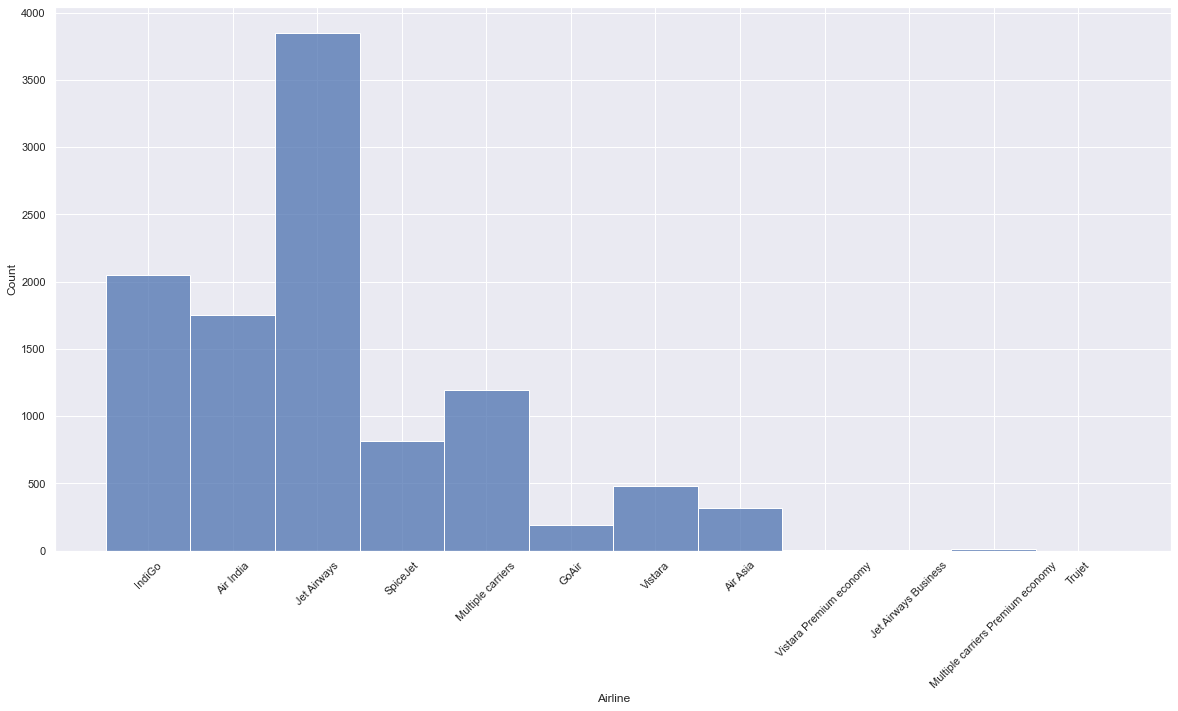

In [15]:
sns.histplot(data = flightsTrain, x = 'Airline')
plt.xticks(rotation=45);

The majority of flights are from Jet Airways. There is very little data for Vistara Premium economy, Jet Airways Business, Multiple carriers Premium 

- <b>Source:</b> String variable. Describes what city the plane originated/started from. Can be the following cities:

In [16]:
flightsTrain['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

<AxesSubplot:xlabel='Source', ylabel='Count'>

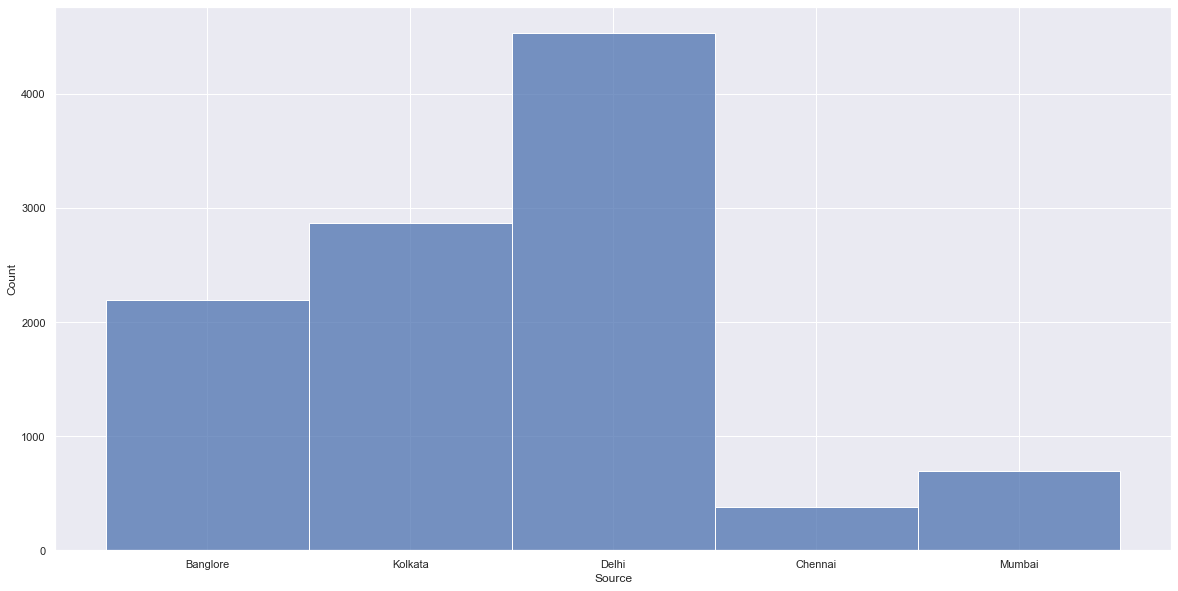

In [17]:
sns.histplot(data = flightsTrain, x = 'Source')

The majority of flights originate from Delhi, and Chennai has the least number of originating flights in this dataset.

- <b>Destination:</b> String variable. Describes what city the plane ended at. This does not include any intermediate cities where stops may occur. Can be the following cities:

In [18]:
flightsTrain['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

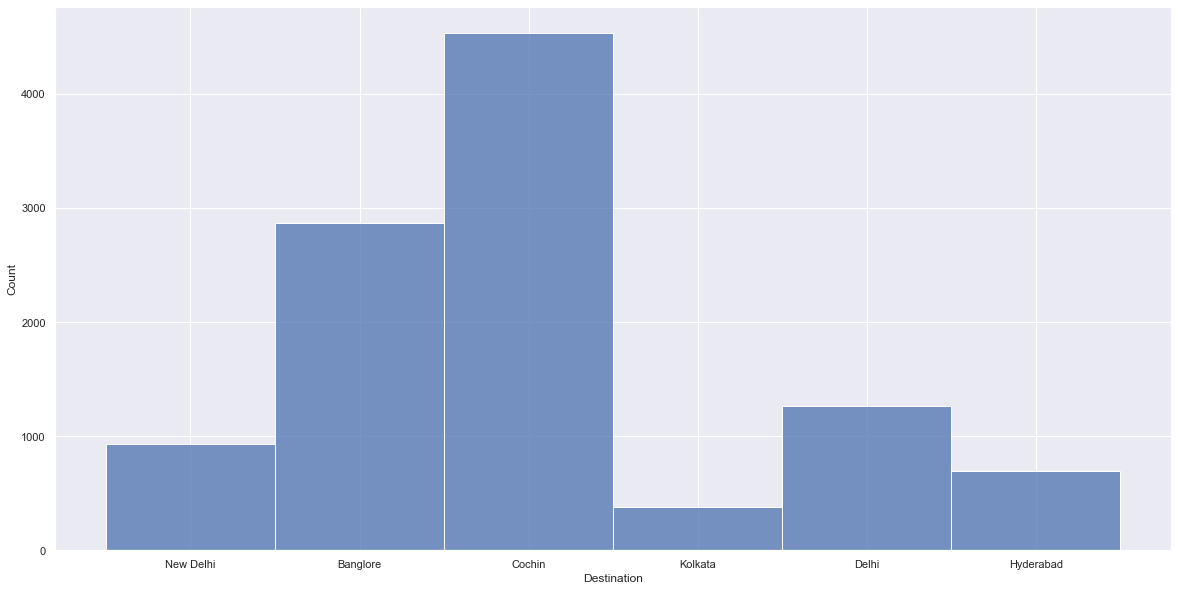

In [19]:
sns.histplot(data = flightsTrain, x = 'Destination');

The majority of flights arrive at Cochin. It is important to note that there are no originating flights out of Cochin. This makes me question how the data was gathered, but still allows us to model this dataset. It would be impossible to generalize any findings without knowing more information about how the data was gatehred.

- <b>Route:</b> String variable. Describes what path the plane took to get from the source to the destination. Always starts with the source city and ends with the destination city. Uses "->" as delimeters.

- <b>Date_of_Journey:</b> DateTime object. Incicates the day the journey was taken. Ranges from  01-03-2019 to 12-06-2019.

Instead of doing a histogram for every date, I will convert the dates into months and days of the week for further analysis.

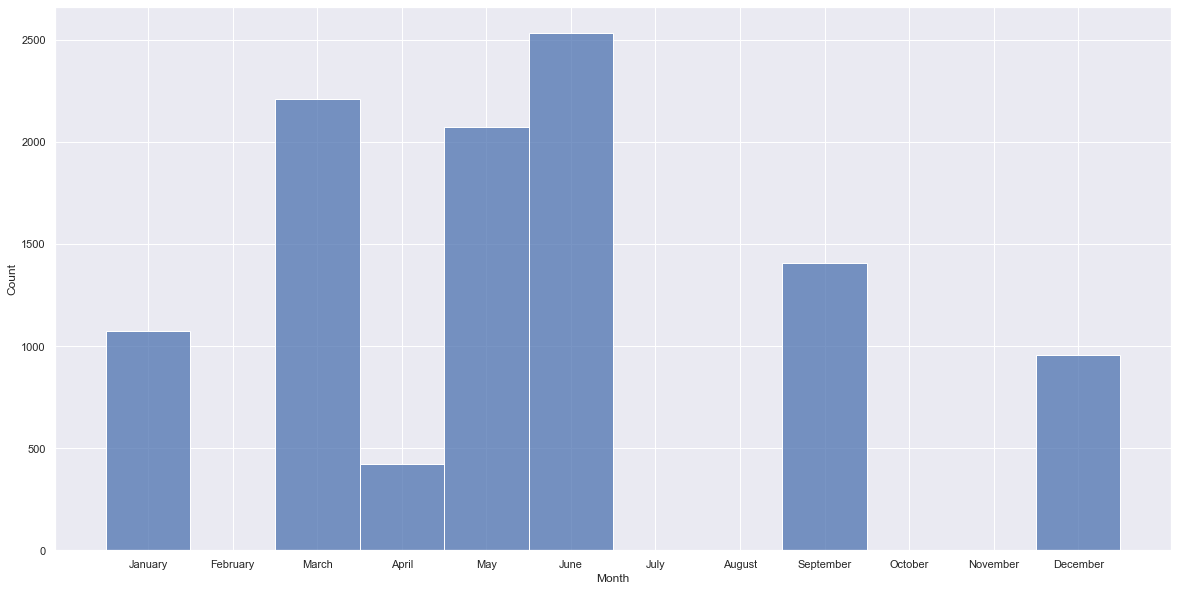

In [20]:
flightsTrain['Month'] = flightsTrain['Date_of_Journey'].dt.month_name()
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
flightsTrain['Month'] = pd.Categorical(flightsTrain['Month'], categories=months, ordered=True)
sns.histplot(x = "Month", data = flightsTrain);

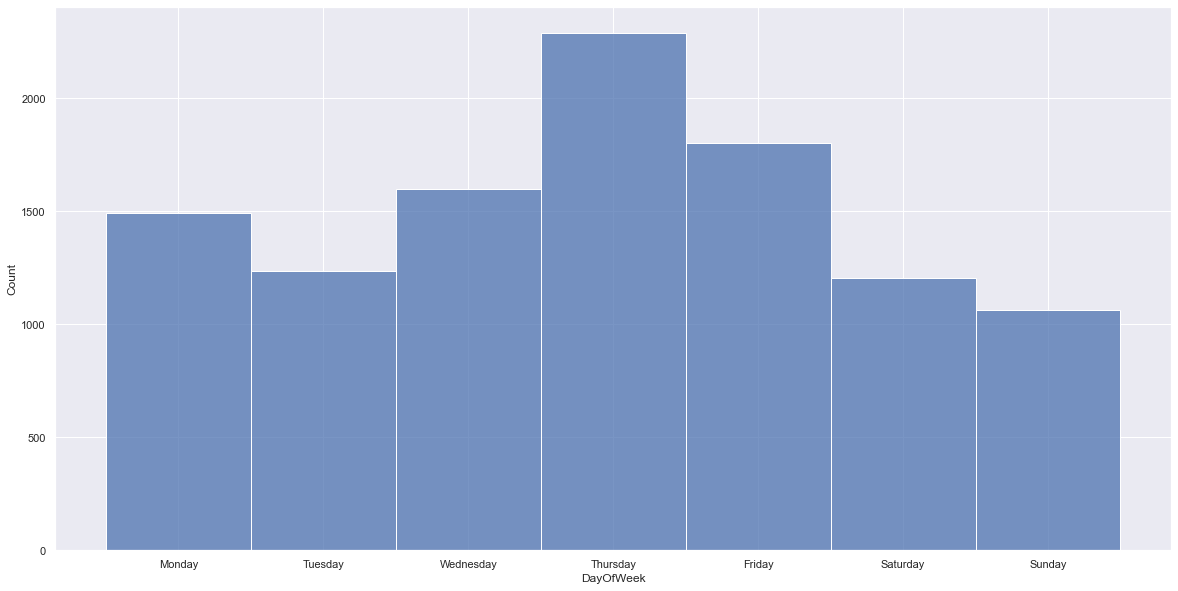

In [21]:
flightsTrain['DayOfWeek'] = flightsTrain['Date_of_Journey'].dt.day_name()
dayofweek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
flightsTrain['DayOfWeek'] = pd.Categorical(flightsTrain['DayOfWeek'], categories=dayofweek, ordered=True)
sns.histplot(x = "DayOfWeek", data = flightsTrain);

The collection of data seems to be incomplete, since there are multiple months that are not included in the dataset. This is okay for analysis, but fails to generalize possible future data.

- <b>Dep_Time:</b> Time varaible. Describes when the plane departed the source city. Ranges from 00:20 to 23:55 (24 hour format)

In [22]:
print("Min:",flightsTrain['Dep_Time'].min())
print("Max:",flightsTrain['Dep_Time'].max())

Min: 00:20
Max: 23:55


In [23]:
flightsTrain['Dep_Time'] = (pd.to_datetime(flightsTrain['Dep_Time'].str.strip(), format='%H:%M'))

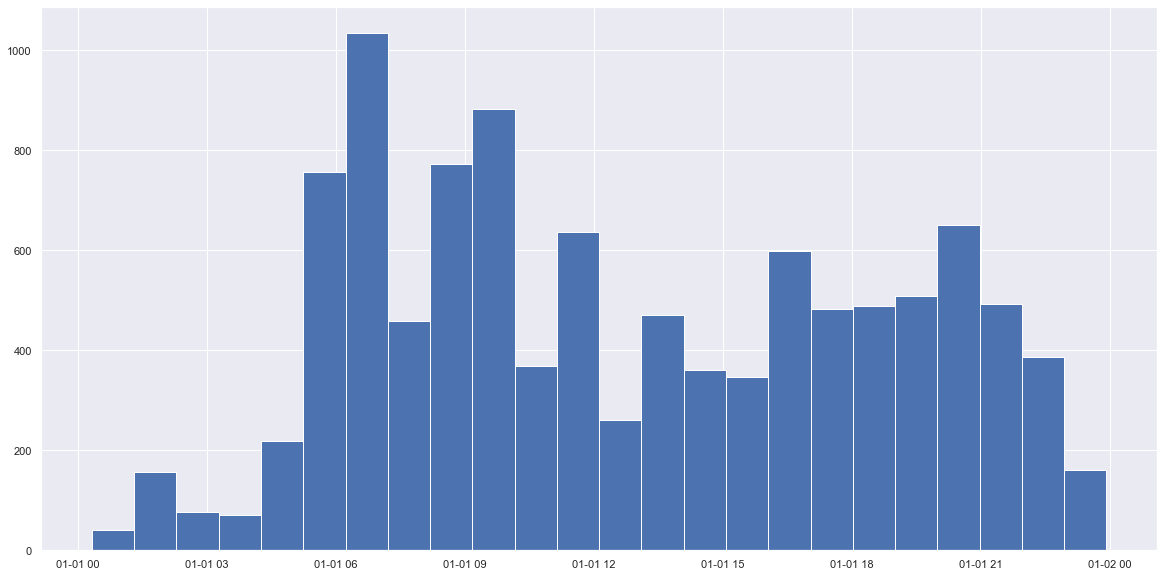

In [24]:
#24 days because 24 hours
flightsTrain['Dep_Time'].hist(bins=24);

Most flights are from 5:00 to 22:00. Few flights (probably classified as red-eyes but that can be double checked) depart 23:00 to 4:00. 

- <b>Arrival_Time:</b> Time variable. Describes when the plane arrived at the destination city. Flights that spanned 2 different dates are given additional date/month lables. We would need to clean up this column to do analysis (Maybe just list the time itself and remove the date/month lables).

In [25]:
flightsTrain['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object

- <b>Duration:</b> Integer variable. Describes the total time the flight spanned (Arrival_Time - Dep_Time). Formatted as hours and minutes.

In [26]:
print(flightsTrain['Duration'])

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object


In [27]:
#Convert Duration into minutes
flightsTrain['Duration'] = pd.to_timedelta(flightsTrain['Duration']).astype('timedelta64[m]')
flightsTrain['Duration'] = pd.to_numeric(flightsTrain['Duration'])

In [28]:
print(flightsTrain['Duration'].describe())

count    10682.000000
mean       643.020502
std        507.830133
min          5.000000
25%        170.000000
50%        520.000000
75%        930.000000
max       2860.000000
Name: Duration, dtype: float64


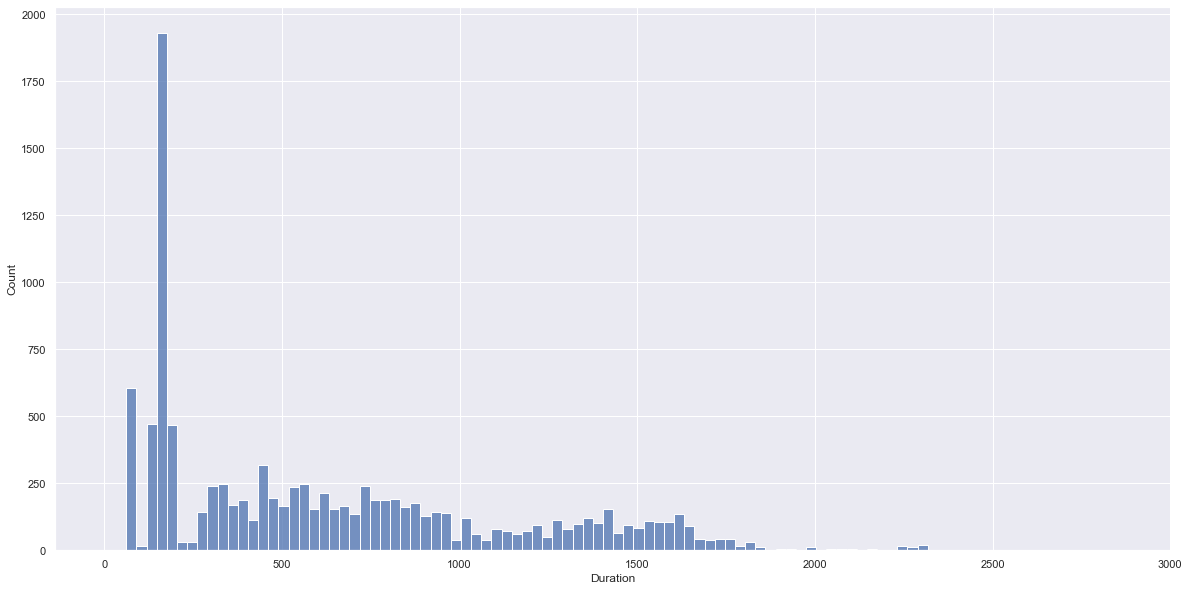

In [29]:
sns.histplot(x = flightsTrain['Duration'], bins = 100);

Most flights are about at least 2 hours long. This variable is heavily skewed right, inflating the mean.

- <b>Total_Stops:</b> String variable. Includes the total number of additional stops the airplane made. Should be converted to an integer for analysis. Ranges from non-stop to 4 stops.

In [30]:
flightsTrain['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [31]:
#Convert Total Stops into an int
flightsTrain['Total_Stops'].replace(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],
                        [0, 1, 2, 3, 4], inplace=True)
flightsTrain['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

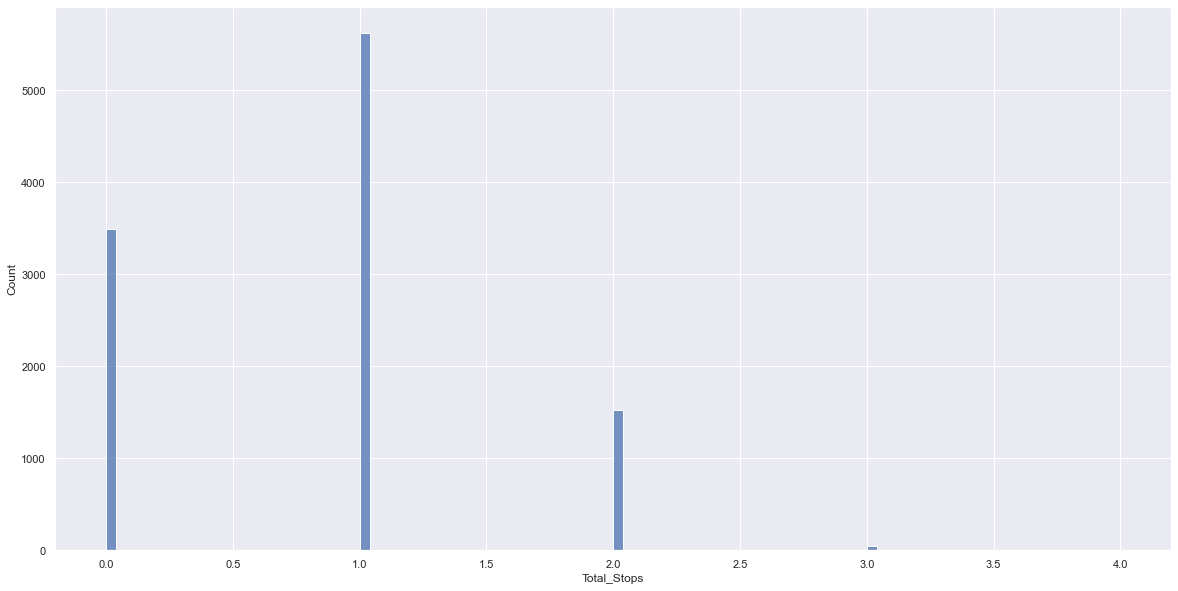

In [32]:
sns.histplot(x = flightsTrain['Total_Stops'], bins = 100,binrange = [0,4]);

In [33]:
flightsTrain.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

Most flights are 0-1 stops, while there are very few 3 and 4 stop flights

- <b>Additional Info:</b> String variable. Multiple different discriptions of the flight such as:

In [34]:
flightsTrain['Additional Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

<AxesSubplot:xlabel='Additional Info', ylabel='Count'>

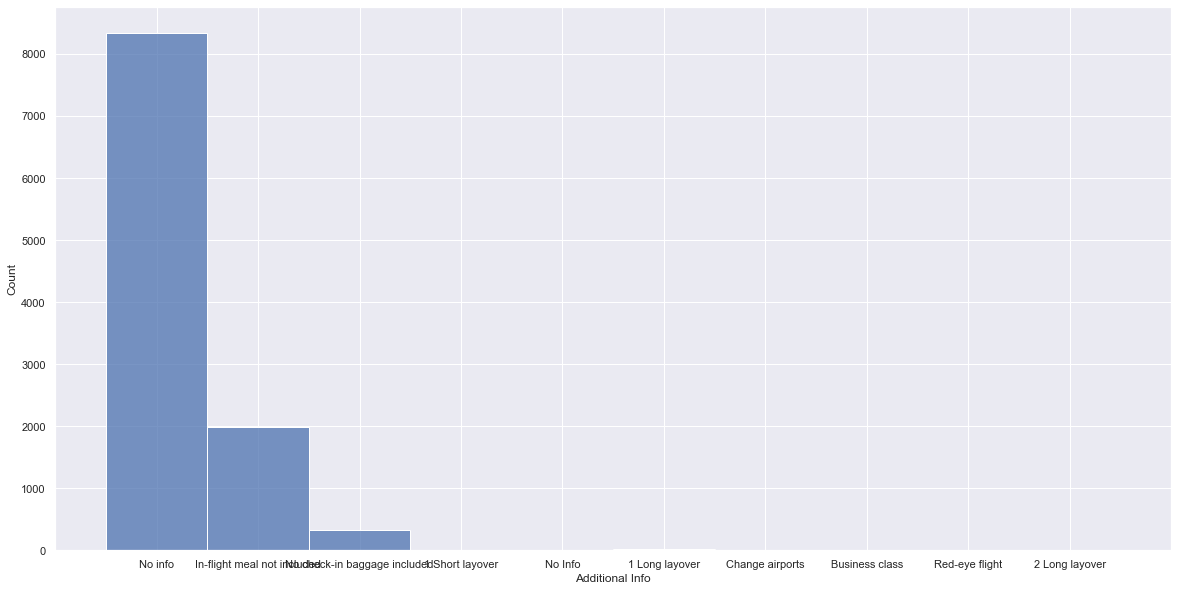

In [35]:
sns.histplot(x = flightsTrain['Additional Info'])

In [36]:
flightsTrain['Additional Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional Info, dtype: int64

Weird column. Really hard to use these values since there is not enough data. There is no refrence to additional facts for this column. For instance, does "In-flight meal not included" mean that all other flights have in-flight meals? Pretty much a useless column unless more information is given. It is hard to belive that these classify the data correctoy. There is 1 singular "red-eye" flight but there are many more 12am-3am flights.

- <b>Price:</b> Float variable. Describes the price of the plane ticket. Does not include any additional information so it is unknown if this is an average. Does not take into account multiple other factors such as when the plane ticket was purchased. The currency is also not specified, but can be assumed as rupees (India's main currency). Ranges from 1,760 to 79,513.

In [37]:
flightsTrain['Price'].describe()

count    10682.000000
mean      9088.214567
std       4611.548810
min       1760.000000
25%       5278.000000
50%       8373.000000
75%      12374.000000
max      79513.000000
Name: Price, dtype: float64

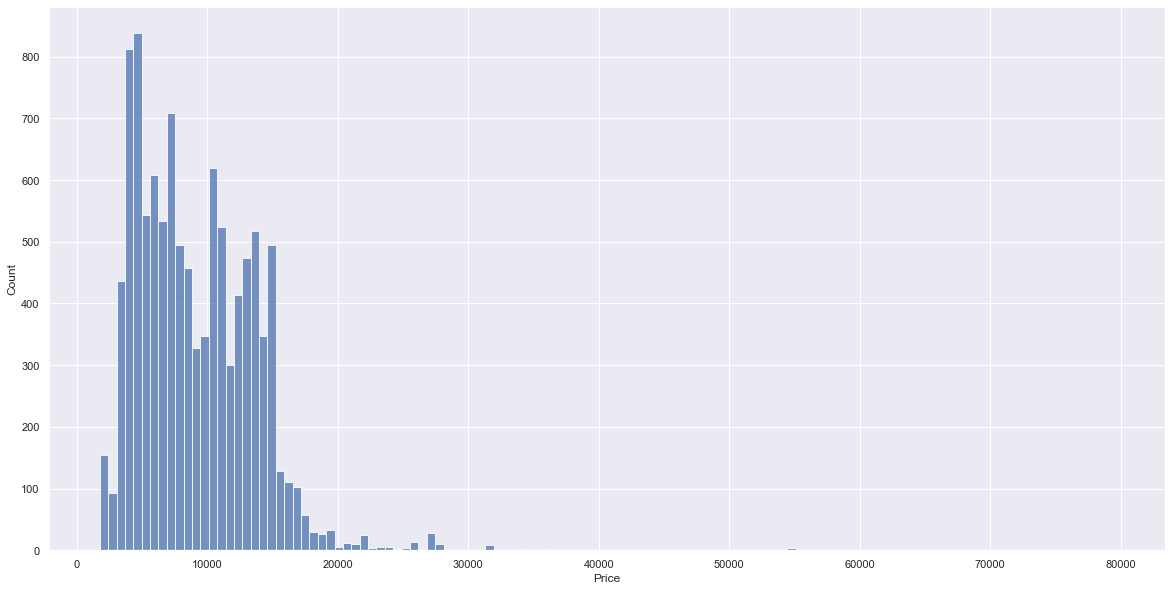

In [38]:
sns.histplot(x = flightsTrain['Price']);

Few outliers that make this variable slightly right-skewed. We also have to assume that this measures the same currency.

#### Holiday Data

In [39]:
holidayData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   offdate  77 non-null     datetime64[ns]
 1   event    77 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.3+ KB


- <b>offdate:</b> Datetime variable. Ranges from 01-01-2017 to 12-25-2019. Will have to do a unique method to combine this dataset with the flights data.

In [40]:
holidayData['offdate'].describe(datetime_is_numeric = True)

count                               77
mean     2018-07-02 09:02:20.259740160
min                2017-01-01 00:00:00
25%                2017-09-30 00:00:00
50%                2018-08-15 00:00:00
75%                2019-04-13 00:00:00
max                2019-12-25 00:00:00
Name: offdate, dtype: object

- <b>event:</b> String variable. Describes the holiday's name. This may be useful for larger datasets or to make this dataset more complete (some holidays may span multiple days). If the dataset was larger it might be helpful to use the speicific holiday as a factor, but this leads to alot of additional columns that may not be impactful for modeling. 

In [41]:
holidayData['event'].unique()

array(["New Year's Day", 'Makar Sankranti / Pongal', 'Republic Day',
       'Maha Shivaratri', 'Holi', 'Ugadi / Gudi Padwa', 'Ram Navami',
       'Mahavir Jayanti', 'Good Friday', 'Labor Day', 'Budhha Purnima',
       'Rath Yatra', 'Eid-ul-Fitar', 'Raksha Bandhan', 'Janmashtami',
       'Independence Day', 'Vinayaka Chaturthi', 'Bakri Id / Eid ul-Adha',
       'Onam', 'Dussehra / Dasara', 'Muharram', 'Mathatma Gandhi Jayanti',
       'Diwali / Deepavali', 'Milad un Nabi', 'Christmas',
       "Guru Nanak's Birthday"], dtype=object)

#### Population Data

In [42]:
populationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 398
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             399 non-null    object
 1   2022 Population  399 non-null    object
 2   Population Rank  399 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.5+ KB


- <b>Name:</b> String variable Describes the name of the city. 399 unique values.

In [43]:
populationData['Name'].unique()

array(['Delhi', 'Mumbai', 'Kolkata', 'Banglore', 'Chennai', 'Hyderabad',
       'Ahmadabad', 'Surat', 'Poona', 'Jaipur', 'Calicut', 'Lucknow',
       'Malappuram', 'Thrissur', 'Cochin', 'Indore', 'Kanpur', 'Nagpur',
       'Coimbatore', 'Thiruvananthapuram', 'Patna', 'Bhopal', 'Agra',
       'Kannur', 'Visakhapatnam', 'Vadodara', 'Nashik', 'Vijayawada',
       'Kollam', 'Rajkot', 'Ludhiana', 'Madurai', 'Meerut', 'Raipur',
       'Benares', 'Jamshedpur', 'Srinagar', 'Aurangabad', 'Tiruppur',
       'Jodhpur', 'Ranchi', 'Jabalpur', 'Asansol', 'Kota', 'Gwalior',
       'Allahabad', 'Amritsar', 'Dhanbad', 'Bareilly', 'Aligarh',
       'Moradabad', 'Mysore', 'Durg-Bhilainagar', 'Bhubaneswar',
       'Tiruchirappalli', 'Chandigarh', 'Hubli-Dharwad', 'Gauhati',
       'Salem', 'Saharanpur', 'Jalandhar', 'Siliguri', 'Solapur',
       'Warangal', 'Dehradun', 'Guntur', 'Bhiwandi', 'Puducherry',
       'Firozabad', 'Cherthala', 'Bikaner', 'Nellore', 'Kottayam',
       'Amravati', 'Gorakhpur', 'Mu

- <b>2022 Population:</b> Integer variable. Describes the population of the city in 2022.

- <b>Population Rank:</b> Ordinal ranking of the population of each city. May be more useful for model building than the total population.

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

#### Merging flight data with holiday data

An easy approach to merge these columns is to add a new column along the lines of 'Is Holiday', however I am an overacheiver and want to add a new column that show how many days since/before the next closest holiday.

In [44]:
mergedData = flightsTrain.copy()
#keep only 2019 holidays
#i can do this because the earliest holiday is earlier than the earliest flight
#and the last holiday is later than the last flight
holidayData = holidayData[holidayData['offdate'] >= "01-01-2019"]

In [45]:
#Items will be the array of holidays
#Pivot will be each date in the flight Dataset
def getNearestHoliday(items, pivot):
    minimumDate = min(items, key=lambda x: abs(x - pivot))
    return abs(minimumDate - pivot)

#Apply function to each row
mergedData['nearestHoliday'] = mergedData.apply(lambda row : getNearestHoliday(holidayData['offdate'],row['Date_of_Journey']), axis = 1)

Now that the holiday data is merged we can match the Source and Destination with the population dataset. I will add a new column for the population and ranking of the population for each 

In [46]:
#Verify they are the same number of rows / match before merging
mergedData.merge(populationData, left_on = 'Source', right_on = 'Name').Source.unique()
mergedData.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [47]:
mergedData = mergedData.merge(populationData, left_on = 'Source', right_on = 'Name', suffixes=('', '_source'))

C:\Users\Jeremy\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  return merge(


ValueError: too many values to unpack (expected 2)

In [48]:
#Still Should be the same number of total rows (10682)
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10681
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Airline          10682 non-null  object         
 1   Date_of_Journey  10682 non-null  datetime64[ns] 
 2   Source           10682 non-null  object         
 3   Destination      10682 non-null  object         
 4   Route            10682 non-null  object         
 5   Dep_Time         10682 non-null  datetime64[ns] 
 6   Arrival_Time     10682 non-null  object         
 7   Duration         10682 non-null  float64        
 8   Total_Stops      10682 non-null  int64          
 9   Additional Info  10682 non-null  object         
 10  Price            10682 non-null  int64          
 11  Month            10682 non-null  category       
 12  DayOfWeek        10682 non-null  category       
 13  nearestHoliday   10682 non-null  timedelta64[ns]
 14  Name             10682

Need to to the same verification and merge for the destination's population

In [49]:
print(mergedData.merge(populationData, left_on = 'Destination', right_on = 'Name').Destination.unique())
mergedData.Destination.unique()

['Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Hyderabad']


array(['New Delhi', 'Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [50]:
#Here we have to clean up and set any 'New Delhi' to 'Delhi' in destination
mergedData.loc[mergedData['Destination'] == 'New Delhi',['Destination']] = 'Delhi'

In [51]:
#now merge like previously but on the destination city
mergedData = mergedData.merge(populationData, left_on = 'Destination', right_on = 'Name', suffixes=('', '_destination'))

In [54]:
mergedData

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Month,DayOfWeek,nearestHoliday,Name,2022 Population,Population Rank,Name_destination,2022 Population_destination,Population Rank_destination
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,1900-01-01 22:20:00,01:10 22 Mar,170.0,0,No info,3898,March,Sunday,3 days,Banglore,"13,193,000",4,Delhi,"32,066,000",1
1,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,285.0,1,No info,13303,January,Thursday,2 days,Banglore,"13,193,000",4,Delhi,"32,066,000",1
2,Jet Airways,2019-12-03,Banglore,Delhi,BLR → BOM → DEL,1900-01-01 18:55:00,10:25 13 Mar,930.0,1,In-flight meal not included,11088,December,Tuesday,21 days,Banglore,"13,193,000",4,Delhi,"32,066,000",1
3,Jet Airways,2019-01-03,Banglore,Delhi,BLR → BOM → DEL,1900-01-01 08:00:00,05:05 02 Mar,1265.0,1,No info,22271,January,Thursday,2 days,Banglore,"13,193,000",4,Delhi,"32,066,000",1
4,Jet Airways,2019-12-03,Banglore,Delhi,BLR → BOM → DEL,1900-01-01 08:55:00,10:25 13 Mar,1530.0,1,In-flight meal not included,11088,December,Tuesday,21 days,Banglore,"13,193,000",4,Delhi,"32,066,000",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Jet Airways,2019-05-18,Mumbai,Hyderabad,BOM → HYD,1900-01-01 07:05:00,08:30,85.0,0,In-flight meal not included,4051,May,Saturday,0 days,Mumbai,"20,961,000",2,Hyderabad,"10,534,000",6
10678,IndiGo,2019-05-27,Mumbai,Hyderabad,BOM → HYD,1900-01-01 02:35:00,04:05,90.0,0,No info,2755,May,Monday,9 days,Mumbai,"20,961,000",2,Hyderabad,"10,534,000",6
10679,Jet Airways,2019-03-05,Mumbai,Hyderabad,BOM → HYD,1900-01-01 02:55:00,04:20,85.0,0,No info,5679,March,Tuesday,1 days,Mumbai,"20,961,000",2,Hyderabad,"10,534,000",6
10680,Air India,2019-06-06,Mumbai,Hyderabad,BOM → HYD,1900-01-01 21:05:00,22:25,80.0,0,No info,3101,June,Thursday,1 days,Mumbai,"20,961,000",2,Hyderabad,"10,534,000",6


### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

In [55]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10681
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   Airline                      10682 non-null  object         
 1   Date_of_Journey              10682 non-null  datetime64[ns] 
 2   Source                       10682 non-null  object         
 3   Destination                  10682 non-null  object         
 4   Route                        10682 non-null  object         
 5   Dep_Time                     10682 non-null  datetime64[ns] 
 6   Arrival_Time                 10682 non-null  object         
 7   Duration                     10682 non-null  float64        
 8   Total_Stops                  10682 non-null  int64          
 9   Additional Info              10682 non-null  object         
 10  Price                        10682 non-null  int64          
 11  Month                       

- <b>Target Variable:</b>
    - Price: Varies between the flights. What would cause the price to change?
<br><br>
- <b>Predictor Variables</b>
    - Airline: Do the prices of each airline vairy?
    - DayOfWeek: Do the prices vairy based on what day the flight occurs?
    - Month: Do the prices vairy based on what month?
    - nearestHoliday: Do holidays affect the price of flights? Also, this can help show why certian months may be higher than others (multicollinearity).
    - Source: Does the outbound city have certian price ranges for flights? (Maybe correlated with specific airports)
        - Source Population (2022 Population / Population Rank)
    - Destination: Does the inbound city have certian price ranges for flights?
        - Destination Population (2022 Population_destination / Population Rank_destination)
    - Duration: Does the time of the flight affect the price?
    - Dep_Time: Does the time the flight takes off affect the price?
    - Total_Stops: Does the number of total stops affect the price? (May be correlated with Duration of the flight)

In [57]:
predictors = ['Airline','DayOfWeek','Month','nearestHoliday','Source','2022 Population', 'Population Rank', 'Destination', '2022 Population_destination',
             'Population Rank_destination', 'Duration', 'Dep_Time', 'Total_Stops']
mergedData[predictors]

,Airline,DayOfWeek,Month,nearestHoliday,Source,2022 Population,Population Rank,Destination,2022 Population_destination,Population Rank_destination,Duration,Dep_Time,Total_Stops
0,IndiGo,Sunday,March,3 days,Banglore,"13,193,000",4,Delhi,"32,066,000",1,170.0,1900-01-01 22:20:00,0
1,IndiGo,Thursday,January,2 days,Banglore,"13,193,000",4,Delhi,"32,066,000",1,285.0,1900-01-01 16:50:00,1
2,Jet Airways,Tuesday,December,21 days,Banglore,"13,193,000",4,Delhi,"32,066,000",1,930.0,1900-01-01 18:55:00,1
3,Jet Airways,Thursday,January,2 days,Banglore,"13,193,000",4,Delhi,"32,066,000",1,1265.0,1900-01-01 08:00:00,1
4,Jet Airways,Tuesday,December,21 days,Banglore,"13,193,000",4,Delhi,"32,066,000",1,1530.0,1900-01-01 08:55:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Jet Airways,Saturday,May,0 days,Mumbai,"20,961,000",2,Hyderabad,"10,534,000",6,85.0,1900-01-01 07:05:00,0
10678,IndiGo,Monday,May,9 days,Mumbai,"20,961,000",2,Hyderabad,"10,534,000",6,90.0,1900-01-01 02:35:00,0
10679,Jet Airways,Tuesday,March,1 days,Mumbai,"20,961,000",2,Hyderabad,"10,534,000",6,85.0,1900-01-01 02:55:00,0
10680,Air India,Thursday,June,1 days,Mumbai,"20,961,000",2,Hyderabad,"10,534,000",6,80.0,1900-01-01 21:05:00,0


#### Airline

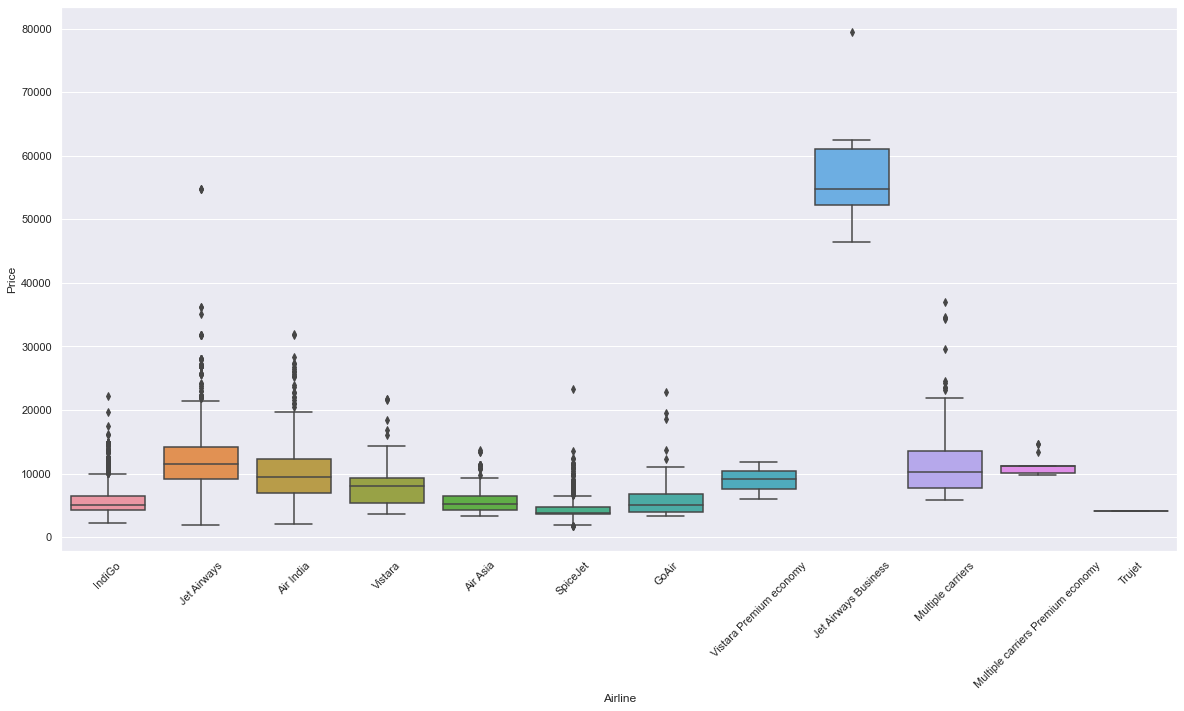

In [81]:
sns.boxplot(data = mergedData, x = 'Airline', y = 'Price');
plt.xticks(rotation=45);

From this plot, we can see that Jet Airways Business is a much expensive carrier than all of the other carriers. The regulare Jet Airways also seems to be a bit of a higher price point than some carriers. This would be an important attribute to include for modeling price.

#### Dates

- DayOfWeek

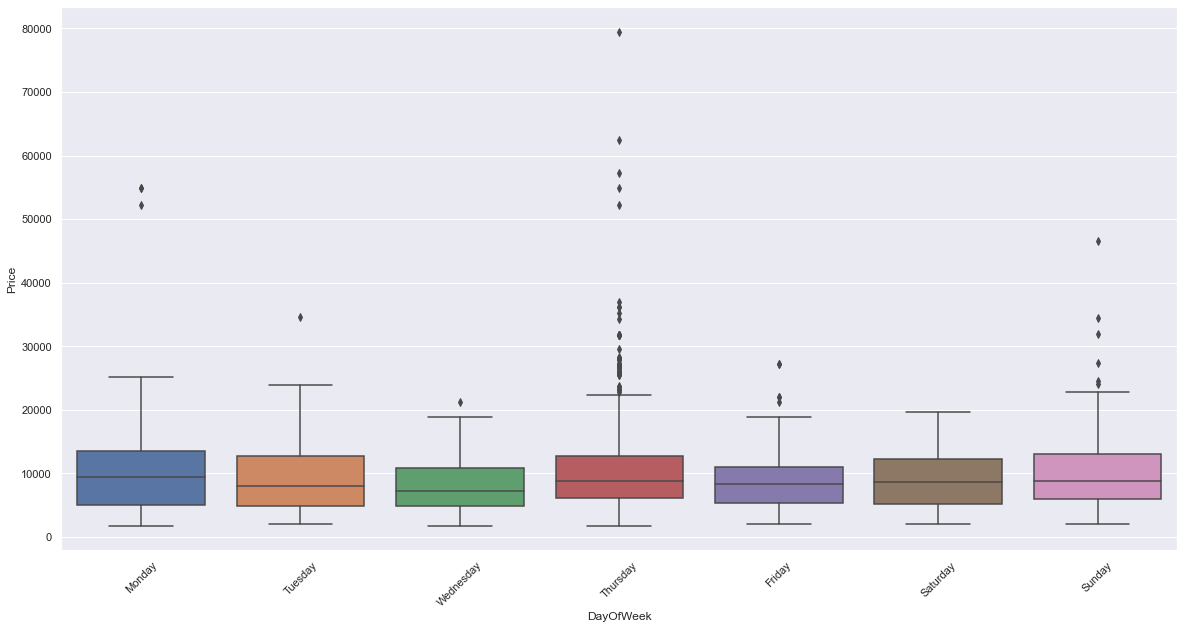

In [82]:
sns.boxplot(data = mergedData, x = 'DayOfWeek', y = 'Price');
plt.xticks(rotation=45);

- Month

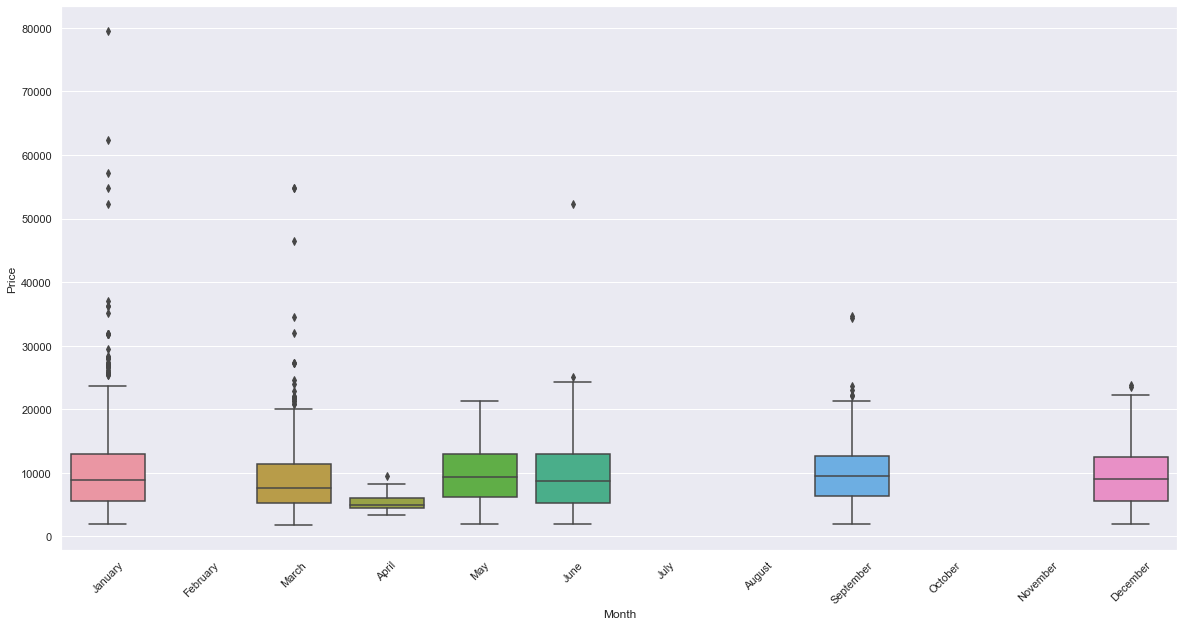

In [83]:
sns.boxplot(data = mergedData, x = 'Month', y = 'Price');
plt.xticks(rotation=45);

- nearestHoliday

In [91]:
# Set nearestHoliday to an integer for plotting
mergedData['nearestHoliday'] = mergedData['nearestHoliday'].dt.days

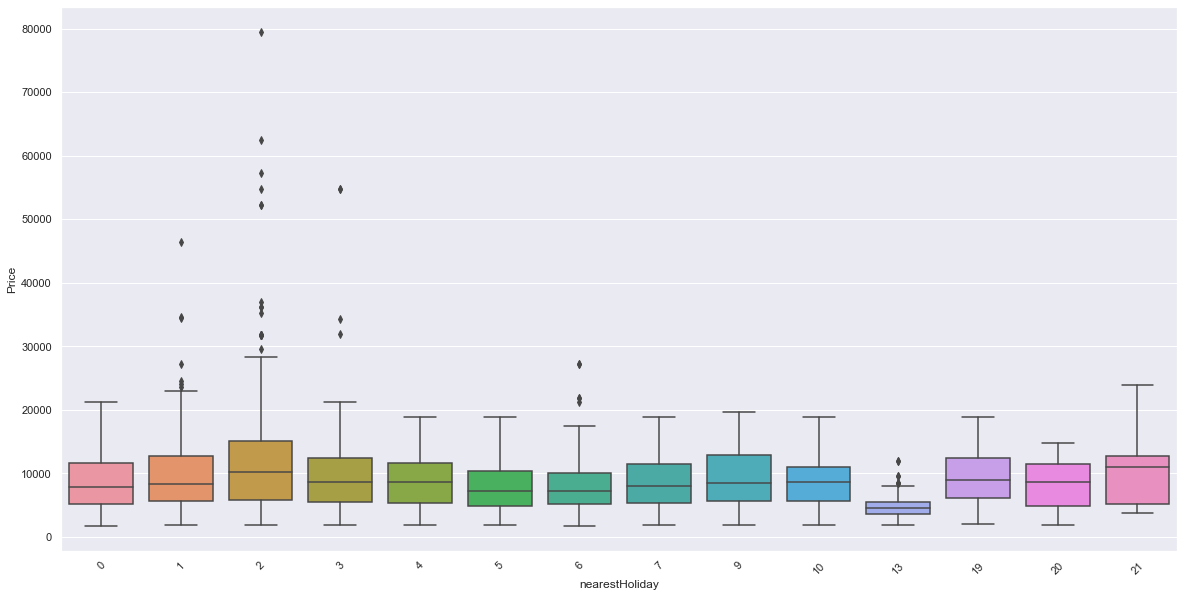

In [92]:
sns.boxplot(data = mergedData, x = 'nearestHoliday', y = 'Price');
plt.xticks(rotation=45);

The price of the flight seems to be consistant within the days of the week, months, and nearest holiday. There is a alot of outliers that appear when the flight is within 2 days of a holiday and that can be explored.

#### Source and Destination

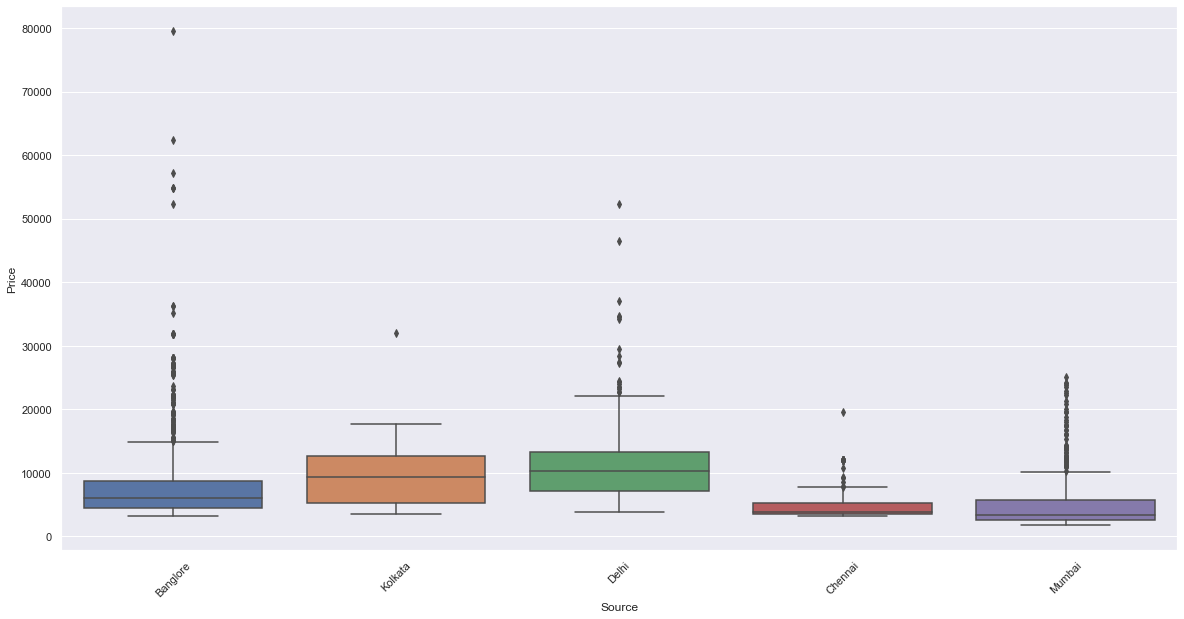

In [94]:
sns.boxplot(data = mergedData, x = 'Source', y = 'Price');
plt.xticks(rotation=45);

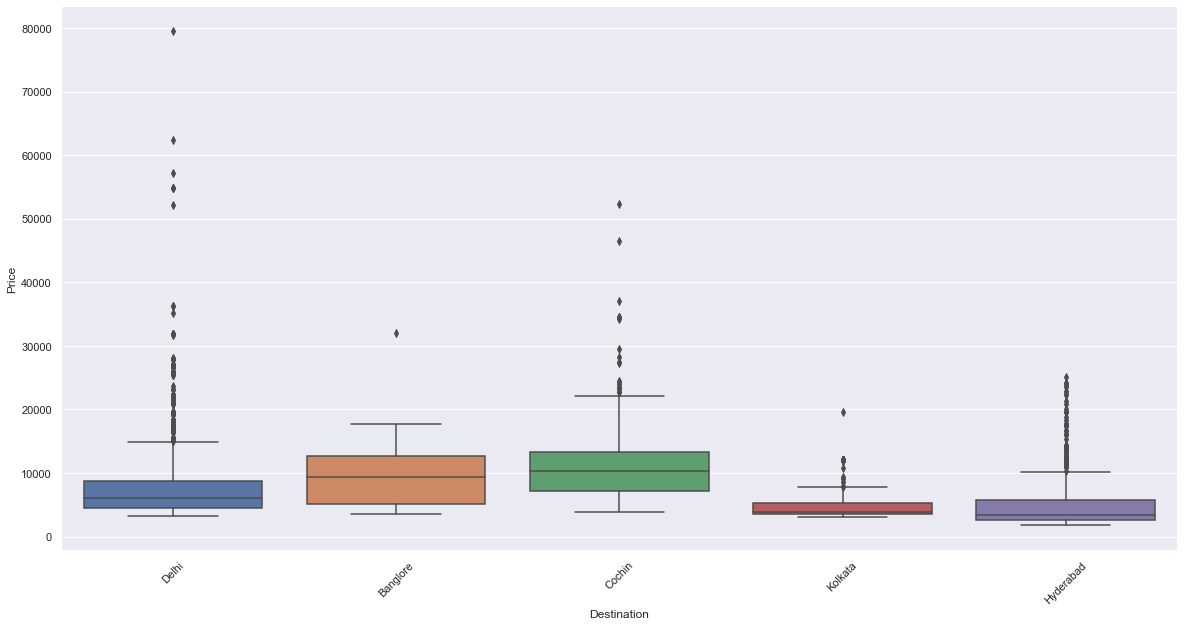

In [109]:
sns.boxplot(data = mergedData, x = 'Destination', y = 'Price');
plt.xticks(rotation=45);

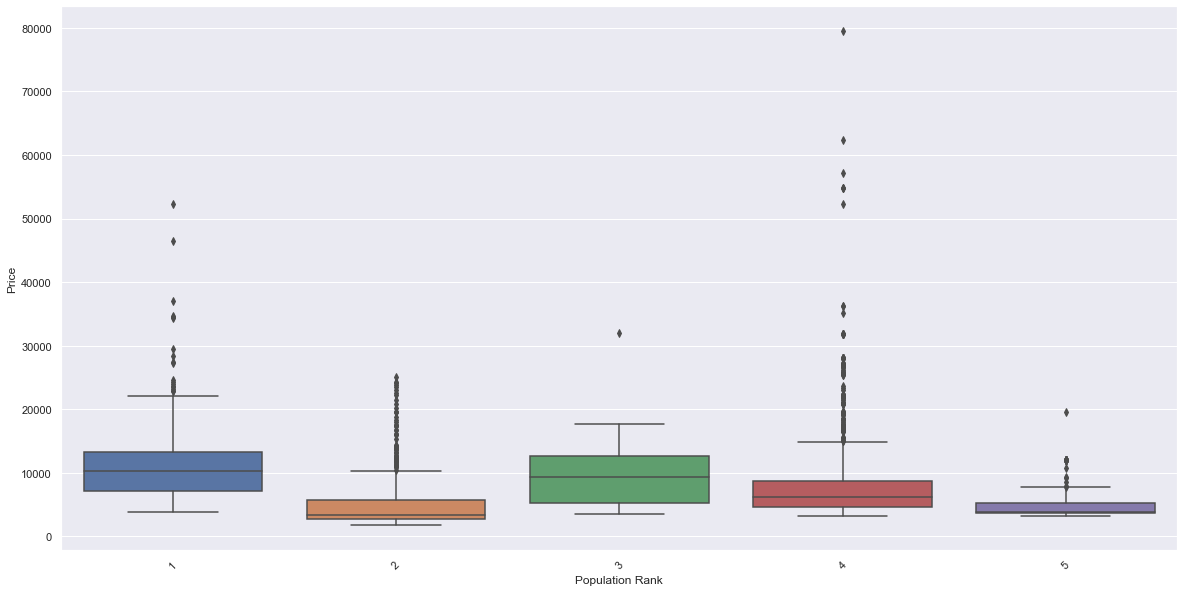

In [116]:
sns.boxplot(data = mergedData, x = 'Population Rank', y = 'Price');
plt.xticks(rotation=45);

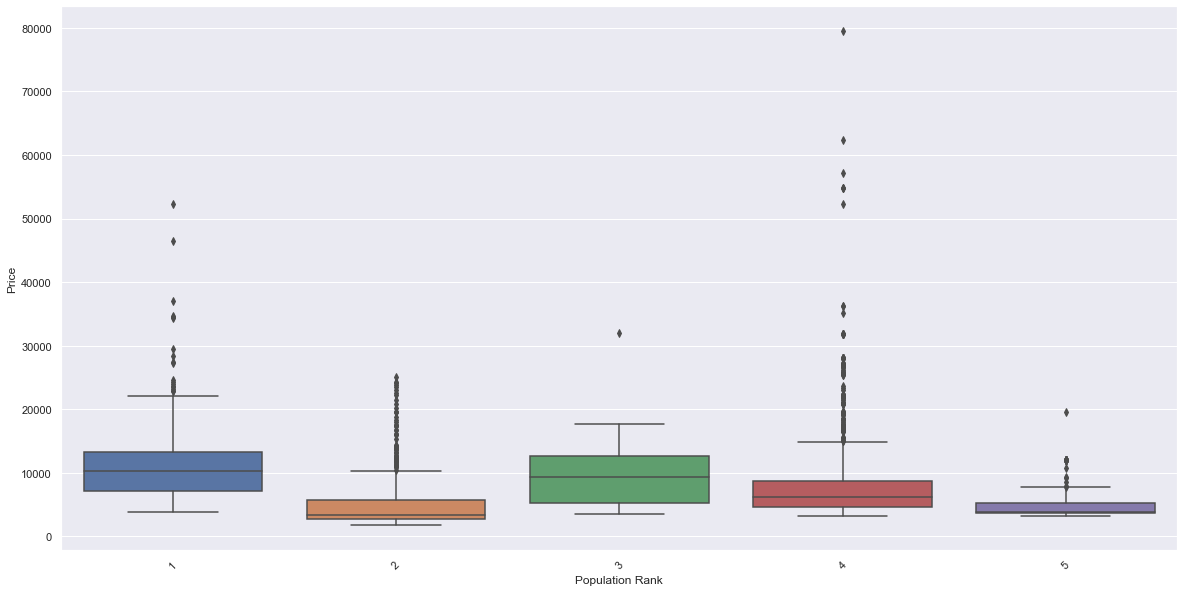

In [107]:
sns.boxplot(data = mergedData, x = '2022 Population_destination', y = 'Price');
plt.xticks(rotation=45);

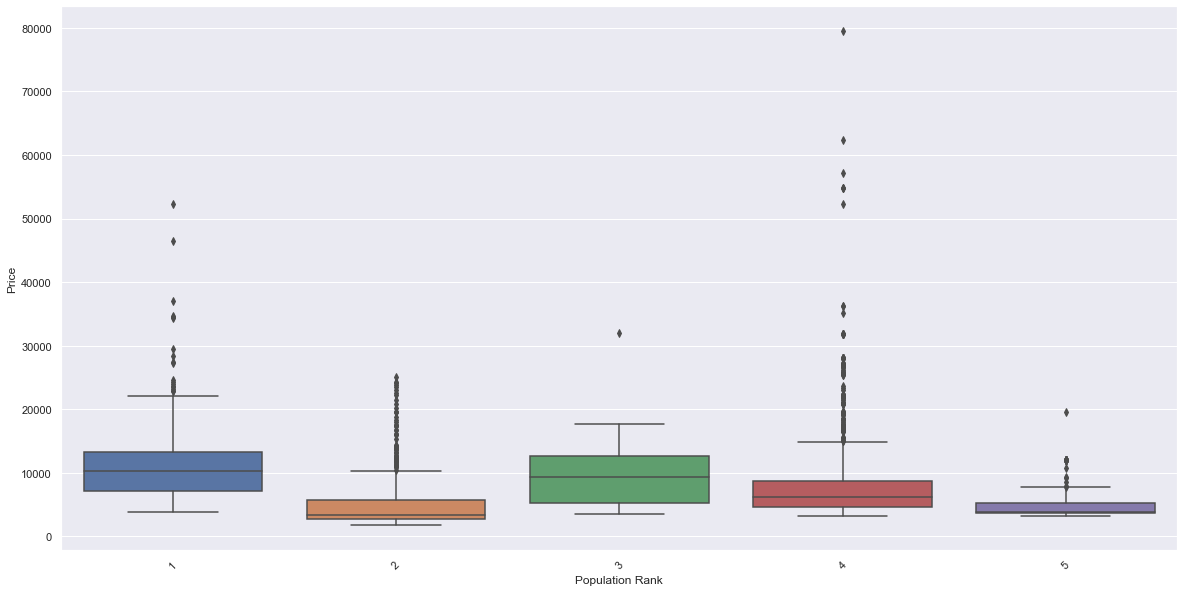

In [118]:
sns.boxplot(data = mergedData, x = 'Population Rank', y = 'Price');
plt.xticks(rotation=45);

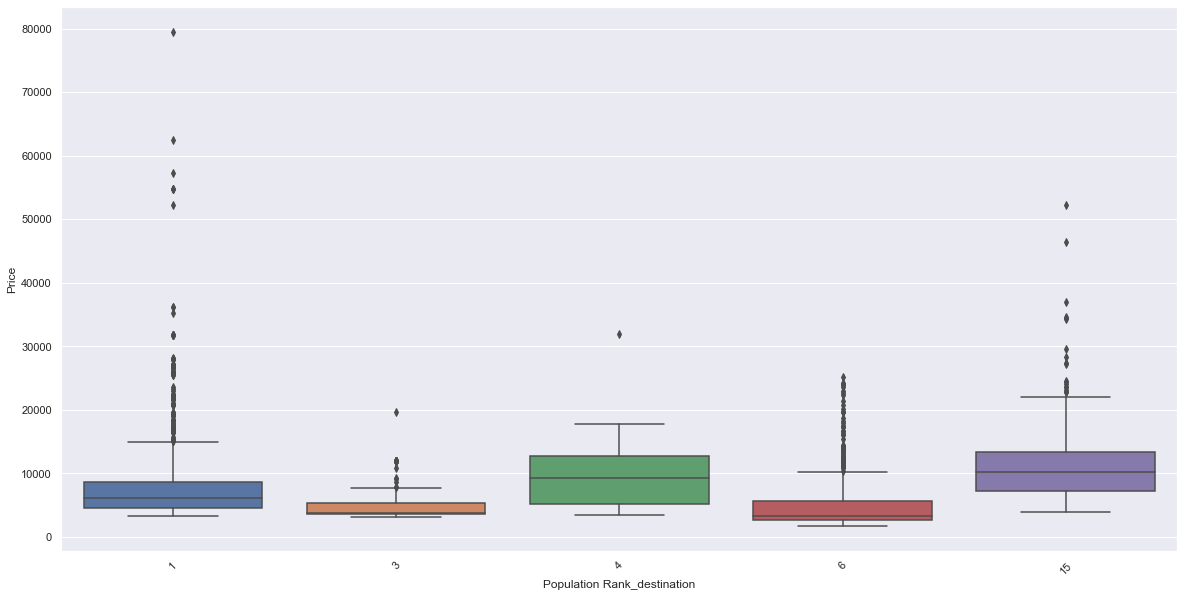

In [119]:
sns.boxplot(data = mergedData, x = 'Population Rank_destination', y = 'Price');
plt.xticks(rotation=45);

Since the cities are categorical, and there are only a few unique cities for source and destination, it actually makes the population aspect practically a categorical type as well. There may be a slight correlation with price and population, but the limited amounts of cities makes it hard to expore further.
It seems that the source and destination city may have a relationship between the price of the flight, but again with the limited cities that are listed, it is harder to compare.

#### Departure Time. Duration, and Total Stops

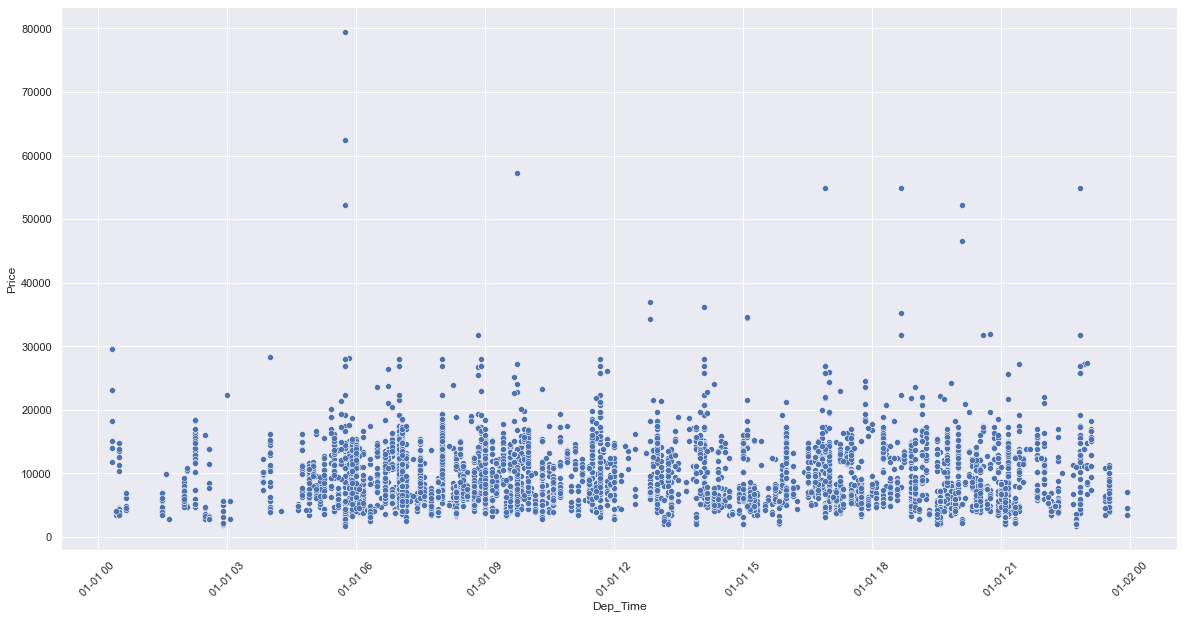

In [112]:
sns.scatterplot(data = mergedData, x = 'Dep_Time', y = 'Price');
plt.xticks(rotation=45);

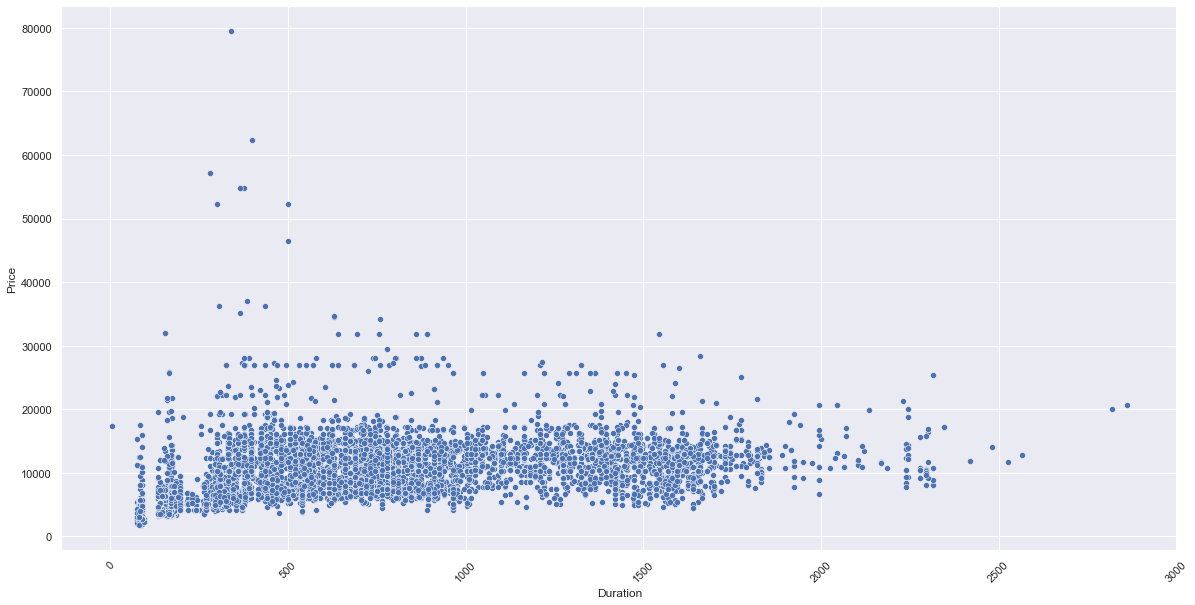

In [121]:
sns.scatterplot(data = mergedData, x = 'Duration', y = 'Price');
plt.xticks(rotation=45);

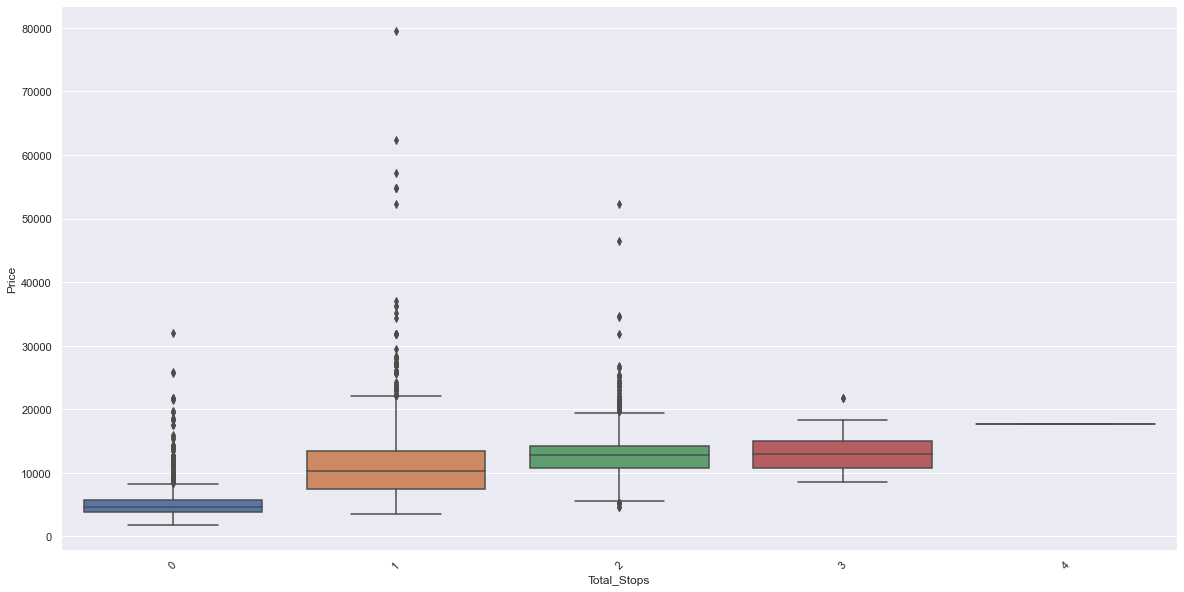

In [115]:
sns.boxplot(data = mergedData, x = 'Total_Stops', y = 'Price');
plt.xticks(rotation=45);

Departure time does not seem to be related to the price. Intrestingly, the duration of the flight also does not seem to impact the price of the flight. However, the total stops in a flight seems to have a positive correlation with the price of a flight.

### Conclusions

Overall, it seems like there are only a few predictor variables analyized that have strong relationships with the price of the fligt (total stops, airline, departure, and destination). Since there are not many unique cities (either in departure or destination) it is hard to visualize if population/population rank has an effect on the price of a ticket. It would be more appropriate to categorize the cities indivually than to use rankings of population. The date of the journey : month, day of week, and nearest holiday, all do not seem to have an effect on the price of a ticekt. The time and duration of the flight also seem to produce consistant prices of tickets. Looking at the histogram and boxplot (below) again, it seems that it would be best to categorize and find out what causes the outlier (more expensive) flights. Most of the flights have similar costs, but there are multiple noteable outliers. From the analysis of the plots above, the next step I would take for this analysis is to look into the outliers of each strong predictor variable and try to figure out what causes them to be outliers.

<AxesSubplot:xlabel='Price'>

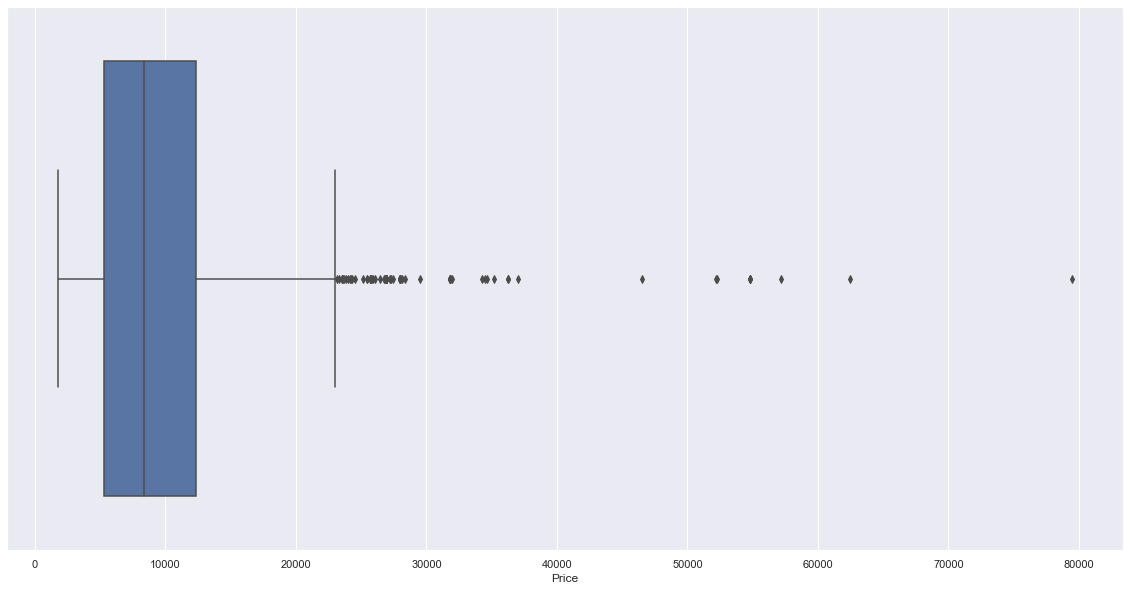

In [122]:
sns.boxplot(data = mergedData, x = 'Price')